<a href="https://colab.research.google.com/github/EvelynChrisyla/WordDetection/blob/main/ResearchMetodology(Fix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textstat
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import nltk
from sklearn.tree import DecisionTreeClassifier
import string
import seaborn
import warnings
import seaborn as sns
import pandas as panda
import matplotlib.pyplot as plt

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

from textstat.textstat import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.porter import *
from gensim.test.utils import common_texts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
from wordcloud import WordCloud
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset = panda.read_csv("Dataset.csv")
dataset

,Label,Tweet
0,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,3,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,3,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,1,"you've gone and broke the wrong heart baby, an..."
24780,3,young buck wanna eat!!.. dat nigguh like I ain...
24781,3,youu got wild bitches tellin you lies


Calculate Text Length

In [ ]:
print("In the dataset, there are 3 categories of sentence classification:")
print("Label 1: Not Abusive Language")  #tidak keduanya 
print("Label 2: Abusive But Not Offensive") #abusive (hatespeech)
print("Label 3: Offensive Language") #offensive (mengancam)

In the dataset, there are 3 categories of sentence classification:
Label 1: Not Abusive Language
Label 2: Abusive But Not Offensive
Label 3: Offensive Language


In [ ]:
dataset['Tweet'] = dataset['Tweet'].astype(str)
dataset['text length'] = dataset['Tweet'].apply(lambda x: len(str(x)))
print(dataset.head())

   Label                                              Tweet  text length
0      1  !!! RT @mayasolovely: As a woman you shouldn't...          140
1      3  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...           85
2      3  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...          120
3      3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...           62
4      3  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...          137


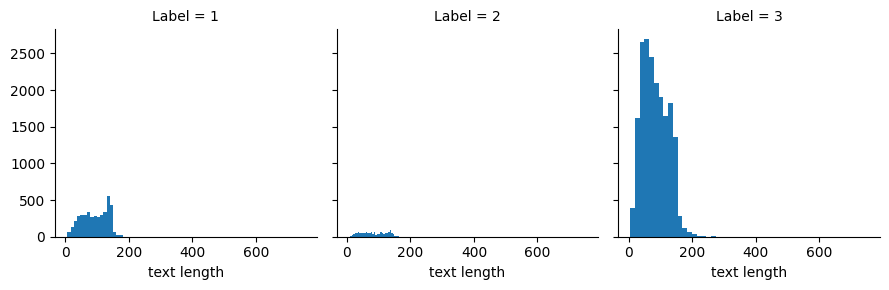

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='Label')
graph.map(plt.hist, 'text length', bins=50)

In [ ]:
tweet=dataset.Tweet

In [ ]:
#stopwords = nltk.corpus.stopwords.words("indonesian")
stopwords = nltk.corpus.stopwords.words("english")
#"stopwords = set(stopwords.words('english'))"
#"inggris = stopwords.words('english')"

In [ ]:
other_exclusions = ["#ff", "ff", "rt","url", "user", "yg", "n", "orang","gak", "udah", "gue", "gua", "ga", "kalo","aja","lu"]
#"stopwords =list()"
stopwords.extend(other_exclusions)
#"stopwords=stopwords.extend(other_exclusions)"
stemmer = PorterStemmer()

In [ ]:
def preprocess(tweet):  
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    tweet_lower = newtweet.str.lower()
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')

    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

processed_tweets = preprocess(tweet)   

dataset['processed_tweets'] = processed_tweets
print(dataset[["Tweet","processed_tweets"]].head(10))

                                               Tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                    processed_tweets  
0  woman complain clean hous amp man alway take t...  
1  boy dat cold tyga dwn bad cuffin dat hoe st place  
2         dawg ever fuck bitch start cri confus shit  
3                                   look like tranni  
4     shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 

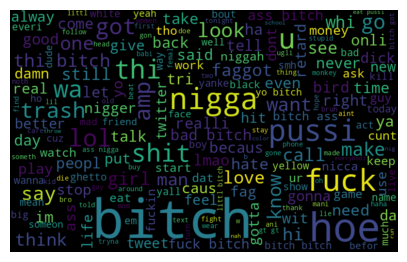

In [ ]:
#ngeluarin kata kata yang aad di tweet 
from wordcloud import WordCloud
all_words = ' '.join([text for text in dataset['processed_tweets'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


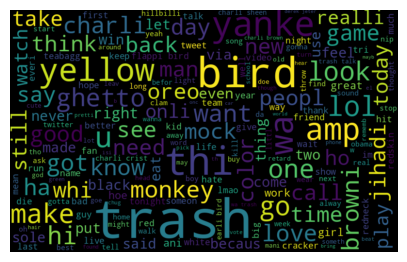

In [ ]:
#ngeluarin kata kata yang nggak termasuk keduanya (label 1)
hatred_words = ' '.join([text for text in dataset['processed_tweets'][dataset['Label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

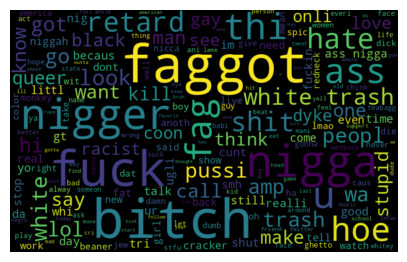

In [ ]:
#ngeluarin kata kata yang termasuk abusive (label 2)
hatred_words = ' '.join([text for text in dataset['processed_tweets'][dataset['Label'] == 2]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

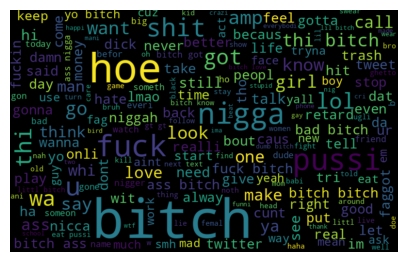

In [ ]:
#Ngeluarin kata kata yang offfensive (label 3)
offensive_words = ' '.join([text for text in dataset['processed_tweets'][dataset['Label'] == 3]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

tfidf = tfidf_vectorizer.fit_transform(dataset['processed_tweets'] )
tfidf

<24783x6635 sparse matrix of type '<class 'numpy.float64'>'
	with 197838 stored elements in Compressed Sparse Row format>

In [ ]:
sentiment_analyzer = VS()
def count_tags(tweet_c):  
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

final_features = sentiment_analysis_array(tweet)


In [ ]:
def additional_features(tweet): 
    
    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    num_chars_total = len(tweet)
    num_words = len(tweet.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(tweet.split()))
    
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    add_features=[FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_words,
    num_unique_terms]
    return add_features

def get_additonal_feature_array(tweets):
    features=[]
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)

fFeatures = get_additonal_feature_array(processed_tweets)

In [ ]:
tfidf_a = tfidf.toarray()
modelling_features = np.concatenate([tfidf_a,final_features],axis=1)
modelling_features.shape

(24783, 6642)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


data = pd.read_csv('Dataset.csv')

X = data['Tweet']
y = data['Label']


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#rumus SVM 
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = svm_classifier.score(X_test, y_test)
print('Support Vector Machine (SVM) Results:')
print(classification_report(y_test, svm_predictions))
print('Accuracy:', svm_accuracy)


# Rumus Naïve Bayes 
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = nb_classifier.score(X_test, y_test)
print('Naïve Bayes Results:')
print(classification_report(y_test, nb_predictions))
print('Accuracy:', nb_accuracy)

# Rumus Decision 
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = dt_classifier.score(X_test, y_test)
print('Decision Tree Results:')
print(classification_report(y_test, dt_predictions))
print('Accuracy:', dt_accuracy)

Support Vector Machine (SVM) Results:
              precision    recall  f1-score   support

           1       0.83      0.89      0.86       835
           2       0.61      0.12      0.20       290
           3       0.92      0.96      0.94      3832

    accuracy                           0.90      4957
   macro avg       0.79      0.66      0.67      4957
weighted avg       0.89      0.90      0.89      4957

Accuracy: 0.9033689731692556
Naïve Bayes Results:
              precision    recall  f1-score   support

           1       0.95      0.10      0.17       835
           2       0.00      0.00      0.00       290
           3       0.79      1.00      0.88      3832

    accuracy                           0.79      4957
   macro avg       0.58      0.37      0.35      4957
weighted avg       0.77      0.79      0.71      4957

Accuracy: 0.7887835384305023


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Results:
              precision    recall  f1-score   support

           1       0.83      0.86      0.84       835
           2       0.29      0.23      0.26       290
           3       0.93      0.94      0.93      3832

    accuracy                           0.88      4957
   macro avg       0.69      0.68      0.68      4957
weighted avg       0.87      0.88      0.88      4957

Accuracy: 0.881783336695582


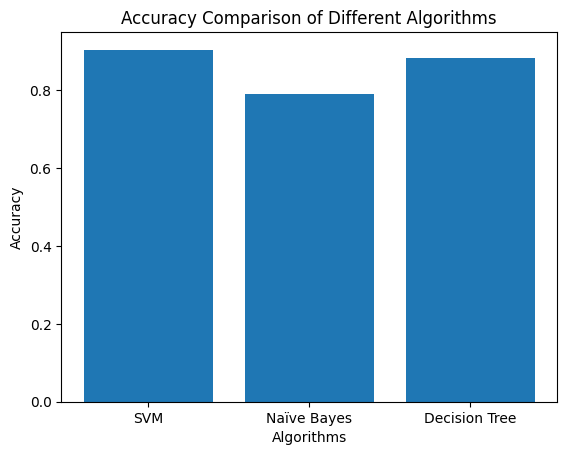

In [ ]:
#nampilin plot graph svm, naive bayes, sama decision 
algorithms = ['SVM', 'Naïve Bayes', 'Decision Tree']
accuracies = [svm_accuracy, nb_accuracy, dt_accuracy]

plt.bar(algorithms, accuracies)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.show()

# paling baru INI YANG DI RUN DAN YANG BENER

In [ ]:
pip install prettytable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


INI TANPA SVM 

In [ ]:
import re
import pandas as pd

# Daftar kata-kata kasar yang ingin dideteksi
bad_words = []

# Membaca file CSV yang berisi kata-kata kasar
with open('bad-words.csv', 'r') as file:
    for line in file:
        word = line.strip()  # Menghapus karakter newline (\n) di akhir baris
        bad_words.append(word)

def detect_bad_words(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus karakter non-alfanumerik
    text = re.sub(r'\W+', ' ', text)
    
    # Memeriksa setiap kata dalam teks
    for word in text.split():
        if word in bad_words:
            return True
    return False

# Membaca file CSV menggunakan pandas
data = pd.read_csv('Dataset.csv')

# Menyiapkan kolom untuk hasil pemeriksaan
data['Hasil Pemeriksaan'] = ''

# Memeriksa setiap tweet dalam dataset
for i, tweet in enumerate(data['Tweet']):
    if detect_bad_words(tweet):
        data.at[i, 'Hasil Pemeriksaan'] = "!! Peringatan anda dapat Terkena pelanggaran UUD dengan Pasal 28 ayat (2) UU ITE !!"
    else:
        data.at[i, 'Hasil Pemeriksaan'] = "Tweet anda aman dan tidak Terkena pelanggaran UUD."

# Menampilkan tabel hasil pemeriksaan
print(data[['Tweet', 'Hasil Pemeriksaan']])

                                                   Tweet  \
0      !!! RT @mayasolovely: As a woman you shouldn't...   
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
...                                                  ...   
12191  Kanyes verse on "I won" is making hoes feel li...   
12192  Karlie jus put all these bitches on niggas bet...   
12193  Karma a bitch, but she can't figure me out wit...   
12194                                   Karma is a bitch   
12195                 Karma is a bitch and usually comes   

                                       Hasil Pemeriksaan  
0      Tweet anda aman dan tidak Terkena pelanggaran ...  
1      Tweet anda aman dan tidak Terkena pelanggaran ...  
2      !! Peringatan anda dapat Terkena pelanggaran U...  
3      !! Peringatan anda dapat Terkena pel

PAKAI SVM tapi masi belum keapus symbol symbolnya 

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

# Fungsi untuk melakukan pra-pemrosesan teks
def preprocess_text(text):
    # Menghilangkan tanda !, @ username, angka, simbol, dan lainnya
    text = re.sub(r'@\S+|https?\S+|[^a-zA-Z\s]', '', text)
    return text

# Membaca dataset.csv yang perlu di telah 
dataset = pd.read_csv('Dataset.csv')

# Membaca datset dari bad-words.csv sebagai patokannzzz
bad_words = pd.read_csv('bad-words.csv')


bad_words_pattern = r'\b(?:{})\b'.format('|'.join(bad_words))

# Pra-processing 
dataset['processed_text'] = dataset['Tweet'].apply(preprocess_text)


vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
features = vectorizer.fit_transform(dataset['processed_text'])
labels = dataset['Label']

#rumus SVm 
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(features, labels)

# Melakukan prediksi
output = []
for i in range(len(dataset)):
    text = dataset.loc[i, 'Tweet']
    processed_text = dataset.loc[i, 'processed_text']
    feature = vectorizer.transform([processed_text])
    prediction = svm_classifier.predict(feature)[0]
    
    if prediction == 1:
        output.append([text, "Tidak mengandung kata Hatespeech"])
    else:
        output.append([text, "Anda dapat terancam Pasal 28 ayat (2) UU ITE"])

output_df = pd.DataFrame(output, columns=['Tweet', 'Hasil Pemeriksaan'])
print(output_df)

                                                   Tweet  \
0      !!! RT @mayasolovely: As a woman you shouldn't...   
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
...                                                  ...   
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...   
24779  you've gone and broke the wrong heart baby, an...   
24780  young buck wanna eat!!.. dat nigguh like I ain...   
24781              youu got wild bitches tellin you lies   
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...   

                                  Hasil Pemeriksaan  
0                  Tidak mengandung kata Hatespeech  
1      Anda dapat terancam Pasal 28 ayat (2) UU ITE  
2      Anda dapat terancam Pasal 28 ayat (2) UU ITE  
3      Anda dapat terancam Pasal 28 ayat (2) UU ITE  
4      An